Nama  : Muhammad Endar Darmawan

Kelas : TI - 3F

Absen : 21

NIM   : 2141720160

# Segmentasi Gambar dengan Clustering

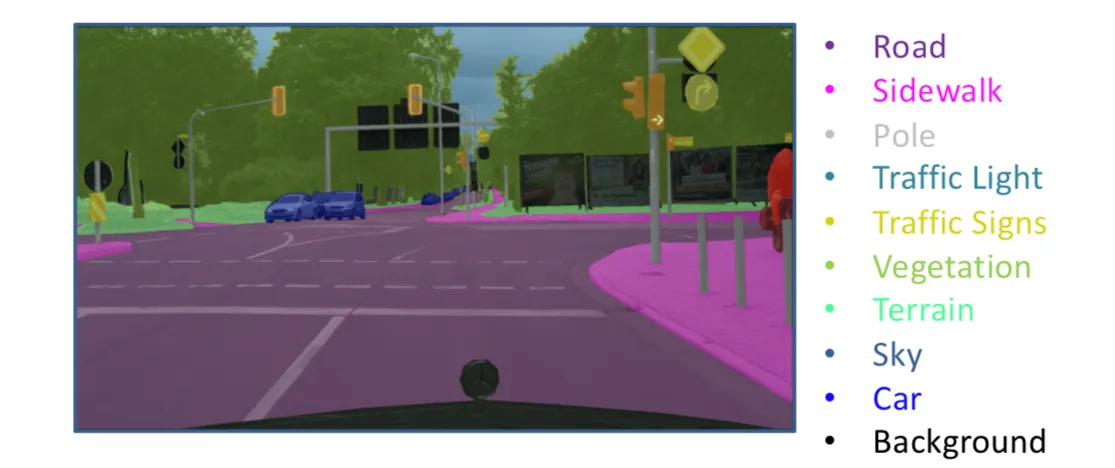

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

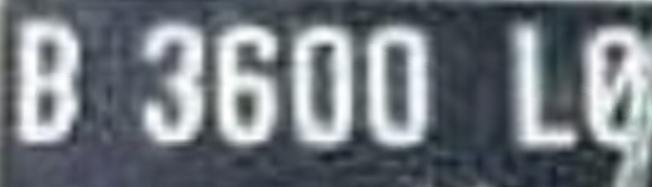

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode K-Means 1 gambar

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

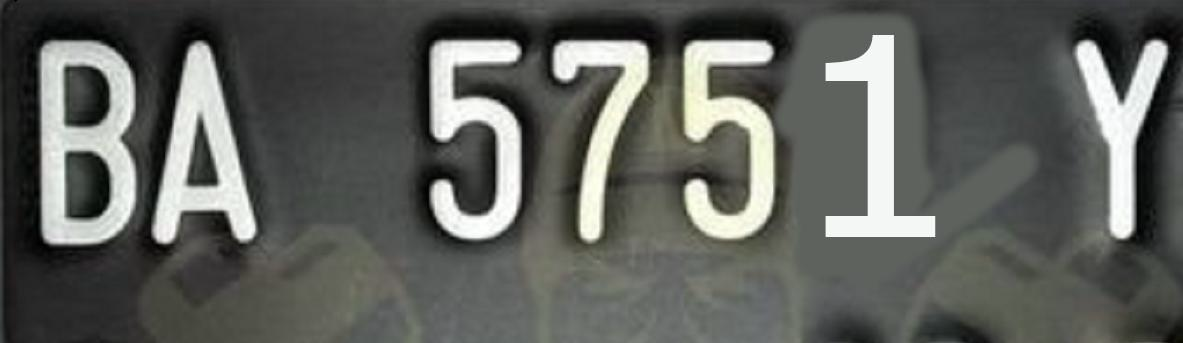

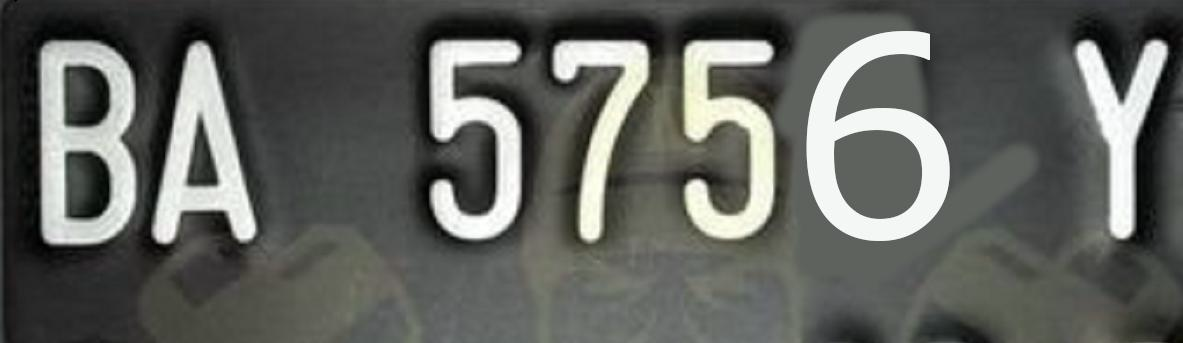

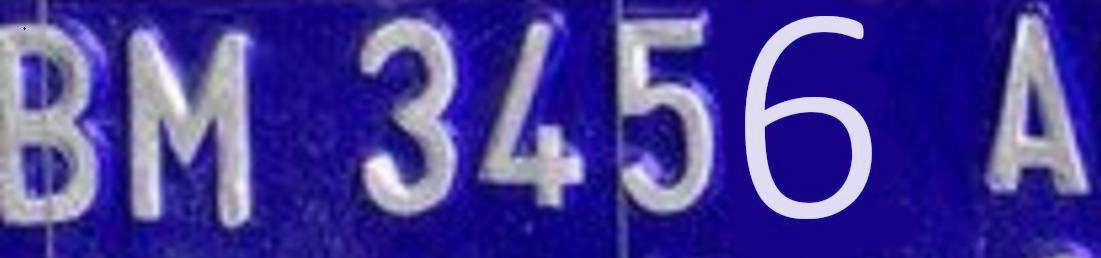

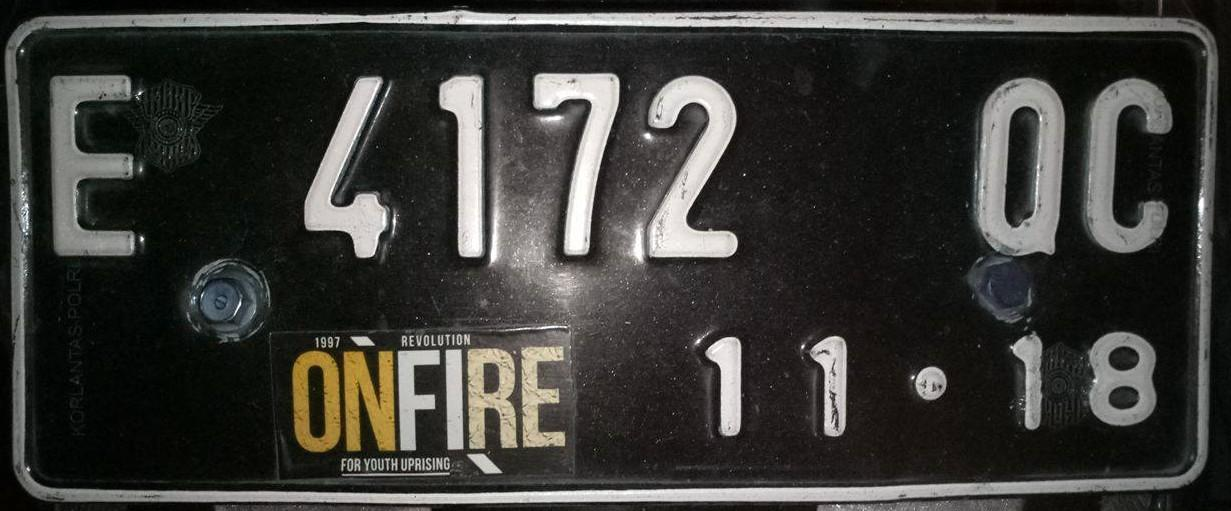

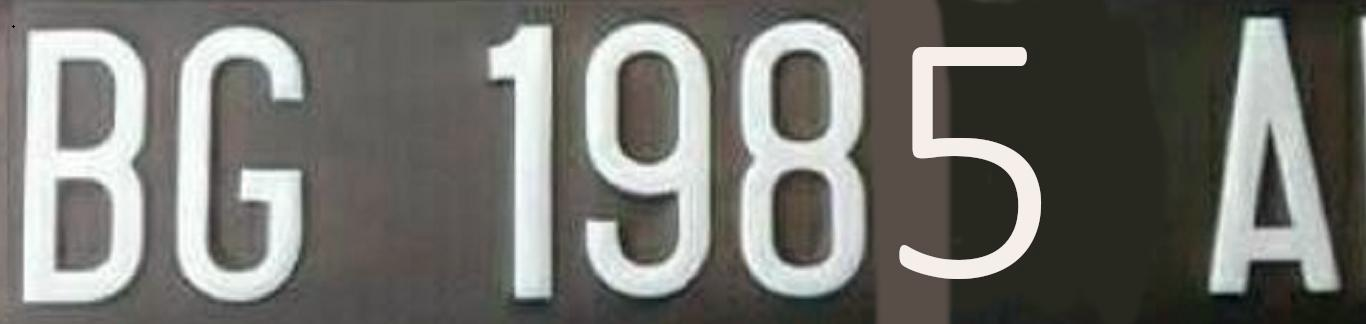

In [13]:
# Load Gambar
image1 = cv.imread('/content/drive/MyDrive/PCVK_2023/UTS/plat1.jpg')
img1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

image2 = cv.imread('/content/drive/MyDrive/PCVK_2023/UTS/plat2.jpg')
img2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

image3 = cv.imread('/content/drive/MyDrive/PCVK_2023/UTS/plat3.jpg')
img3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

image4 = cv.imread('/content/drive/MyDrive/PCVK_2023/UTS/plat4.jpg')
img4 = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

image5 = cv.imread('/content/drive/MyDrive/PCVK_2023/UTS/plat5.jpg')
img5 = cv.cvtColor(image5, cv.COLOR_BGR2RGB)

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img1) # khusus google colab karena ada issue
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)
cv2_imshow(img5)

In [14]:
h, w, ch= img1.shape
print(h)
print(w)
print(ch)

343
1183
3


# Image

In [20]:
data = img1 / 255.0
data = data.reshape(343 * 1183, 3)
data.shape

(405769, 3)

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

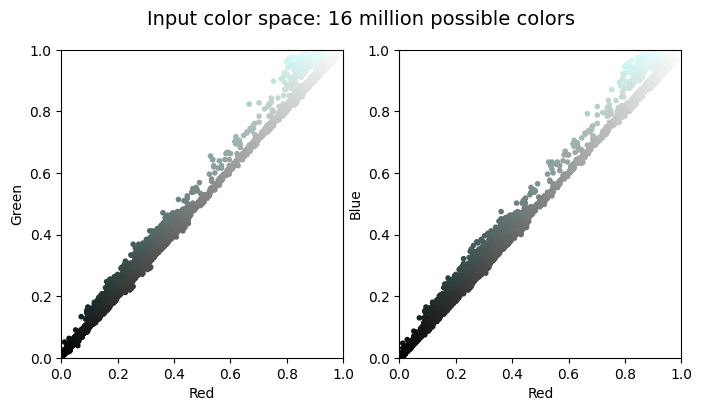

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

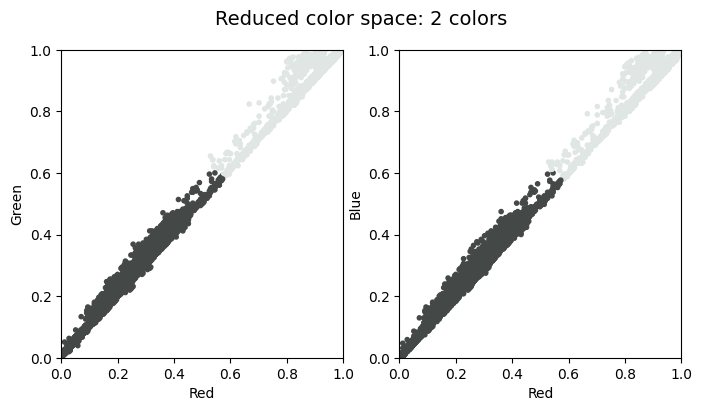

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 2 colors")

Text(0.5, 1.0, '2-color Image')

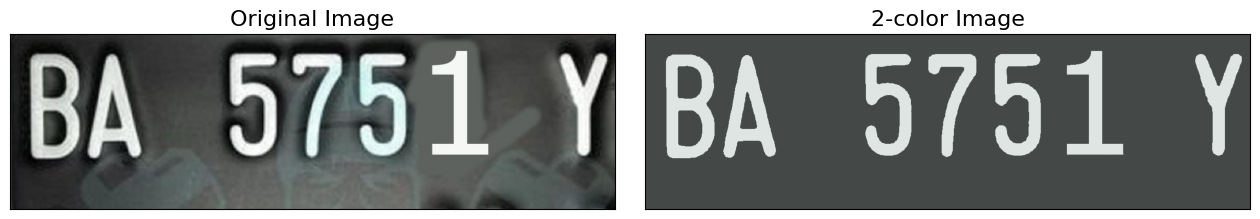

In [24]:
img_recolored = new_colors.reshape(img1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img1)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

# Perbandingan dengan Gambar Asli dengan K-Means 2 warna

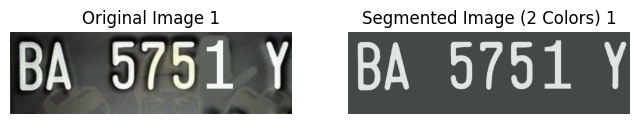

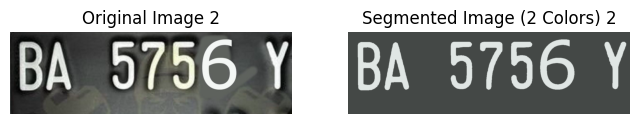

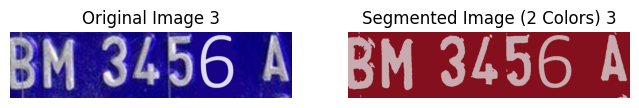

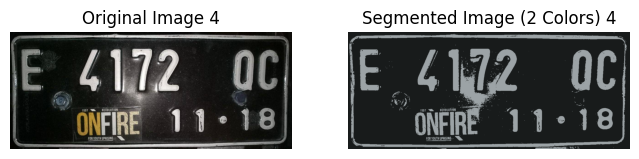

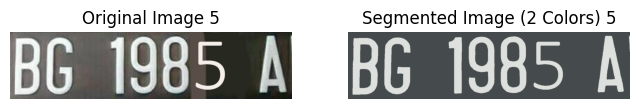

In [25]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

# Load gambar-gambar Anda ke dalam list
images = [img1, img2, img3, img4, img5]  # Gantilah ini dengan gambar yang sebenarnya

# Fungsi untuk mengaplikasikan K-Means dengan 2 kluster warna
def apply_kmeans_2_colors(image):
    # Ubah gambar menjadi larik piksel
    pixels = np.array(image).reshape(-1, 3)

    # Terapkan K-Means dengan 2 kluster
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(pixels)

    # Mengganti warna piksel dengan warna pusat terdekat
    segmented_image = kmeans.cluster_centers_[kmeans.predict(pixels)]

    # Ubah bentuk larik kembali menjadi gambar
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

# Lakukan K-Means dengan 2 kluster untuk setiap gambar dalam list
segmented_images = [apply_kmeans_2_colors(image) for image in images]

# Tampilkan gambar-gambar hasil K-Means dengan 2 kluster warna
for i, segmented_image in enumerate(segmented_images):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Original Image {i + 1}")
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Segmented Image (2 Colors) {i + 1}")
    plt.imshow(segmented_image.astype(np.uint8))
    plt.axis('off')

plt.show()

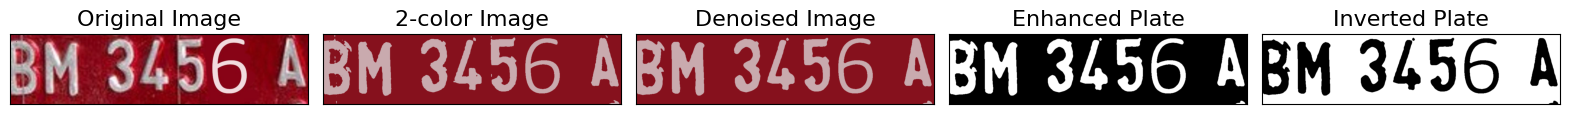

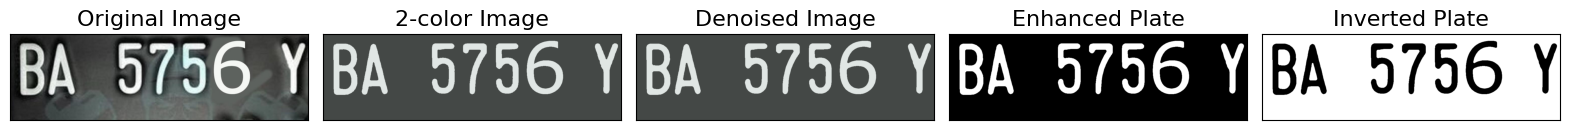

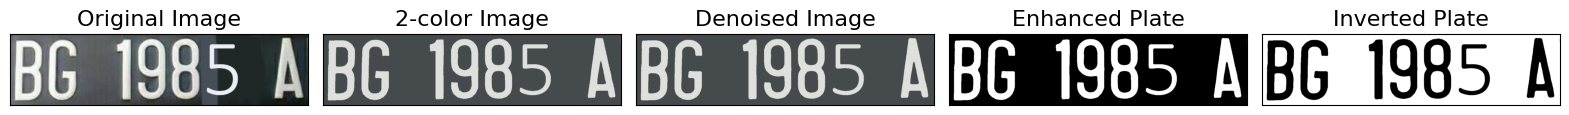

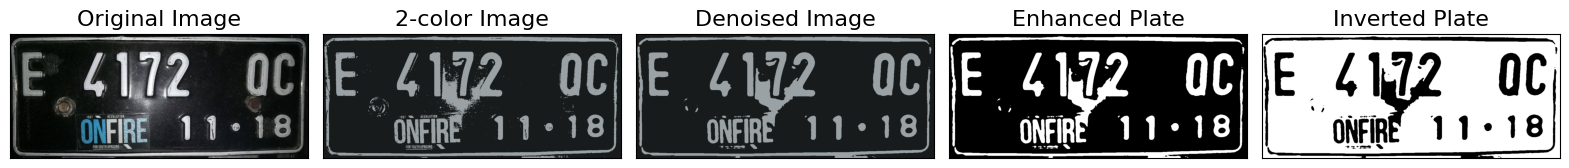

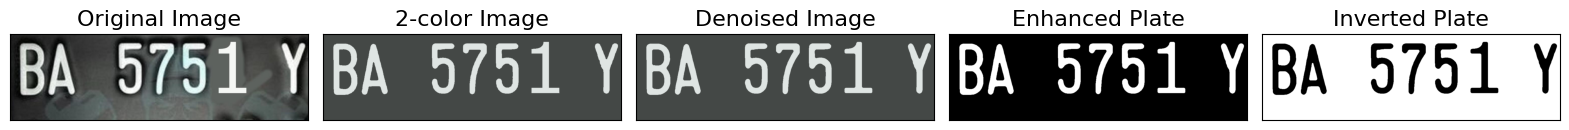

In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna terdiri dari 2 warna
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan plat nomor
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Fungsi untuk menghilangkan noise
def remove_noise(image):
    return cv2.medianBlur(image, 9)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Path ke folder yang berisi gambar
folder_path = '/content/drive/MyDrive/PCVK_2023/UTS'

# Mendapatkan daftar file dalam folder
file = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat
for i, file_name in enumerate(file):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, hasil enhanced, dan hasil inverted pada gambar
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()